# More Reshaping



Continuing from Friday.

In [1]:
import pandas as pd
import seaborn as sns

# make plots look nicer and increase font size
sns.set_theme(font_scale=2)
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'

coffee_df = pd.read_csv(arabica_data_url)

# compute ___ per ___
bag_total_df = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()

# subset the summary Series for countries with over 15000 total and store as a list
high_prod_countries = list(bag_total_df[bag_total_df>15000].index)

# a lambda function that checks if a string c is one of the
#  countries in high_prod_countries
high_prod = lambda c: c in high_prod_countries

# add a column that indicates that the country is a high producer
coffee_df['high_production'] = coffee_df['Country.of.Origin'].apply(high_prod)



# filter based on production level threshold
high_prod_coffee_df = coffee_df[coffee_df['high_production']]

**What happened when we filtered the data?**

In [2]:
coffee_df.shape, high_prod_coffee_df.shape

((1311, 45), (732, 45))

We have many fewer rows.

Now that we've filtered the data. Let's practice reshaping data to by Tidy again.

In [3]:
# replace the FIXMEs
scores_of_interest = ['Balance','Aroma','Body','Aftertaste']
attrs_of_interest = ['Country.of.Origin','Color']
high_prod_coffee_df_melted = high_prod_coffee_df.melt(
    id_vars = attrs_of_interest,
    value_vars = scores_of_interest,
    var_name = 'Score')

What happened?

In [4]:
high_prod_coffee_df_melted.shape

(2928, 4)

Now the shape is 4 times as long (because the length of the list we passed to value_vars is 4). And it has 4 columns: the length of the list we passed to `id_vars` + 2 (variable, value)

In [5]:
len(scores_of_interest)

4

In [6]:
len(scores_of_interest)*len(high_prod_coffee_df)

2928

We can seee the column names and what they have in them here:

In [7]:
high_prod_coffee_df_melted.head()

,Country.of.Origin,Color,Score,value
0,Guatemala,NaN,Balance,8.42
1,Brazil,Bluish-Green,Balance,8.33
2,Mexico,Green,Balance,8.17
3,Brazil,Green,Balance,8.00
4,Brazil,Green,Balance,8.00


Note that we passed a value to `var_name` to make that column named "Score".  We could also not pass that

In [8]:
high_prod_coffee_df.melt(
    id_vars = attrs_of_interest,
    value_vars = scores_of_interest)

,Country.of.Origin,Color,variable,value
0,Guatemala,NaN,Balance,8.42
1,Brazil,Bluish-Green,Balance,8.33
2,Mexico,Green,Balance,8.17
3,Brazil,Green,Balance,8.00
4,Brazil,Green,Balance,8.00
...,...,...,...,...
2923,Mexico,Green,Aftertaste,6.42
2924,Mexico,Green,Aftertaste,6.83
2925,Brazil,Green,Aftertaste,6.83
2926,Mexico,None,Aftertaste,6.25


then we have `variable` and `value` as column names.  

```{admonition} Try it yourself
How could you rename the `value` column?
```

The head has only 'Balance' in the 'Score' column, we could use `sample` to pick a random subset of the rows instead to see different values.

In [9]:
high_prod_coffee_df_melted.sample(5)

,Country.of.Origin,Color,Score,value
1435,Guatemala,NaN,Aroma,6.17
1716,Guatemala,NaN,Body,7.83
1123,Brazil,Green,Aroma,8.25
1212,Colombia,NaN,Aroma,7.58
1814,Mexico,Green,Body,7.25


What does this let us do?

One thing is it makes plots easier, because seaborn is organized around tidy data.

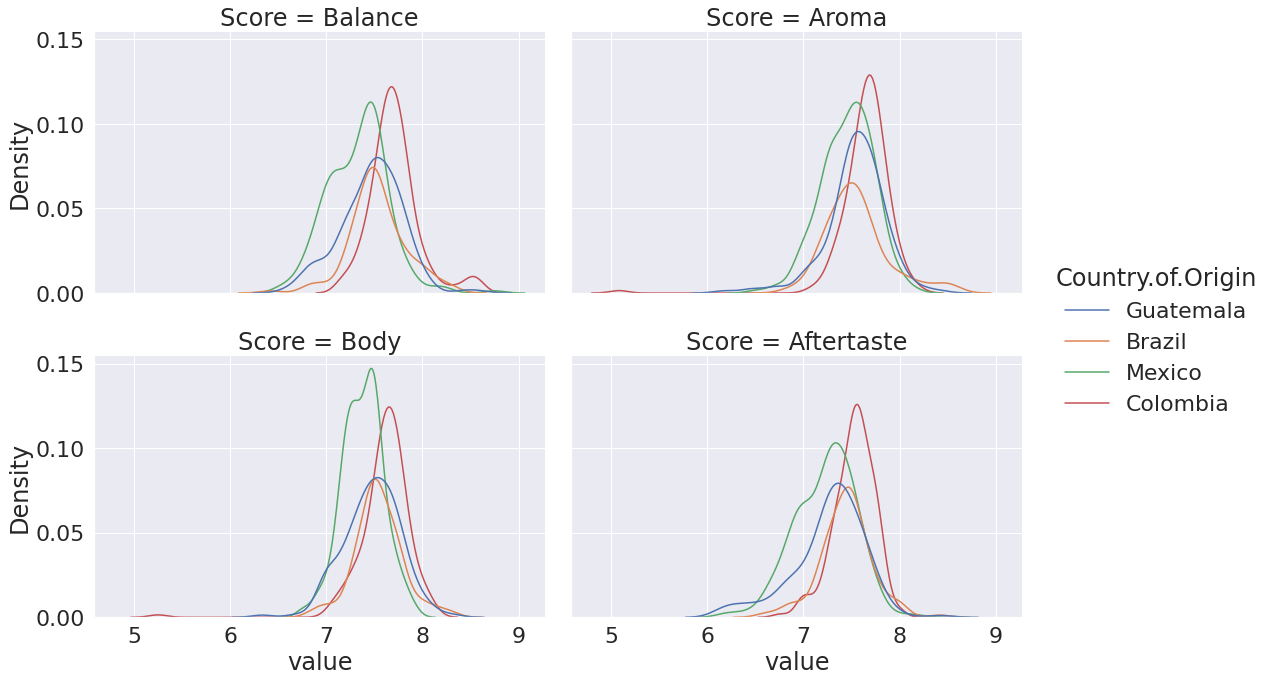

In [10]:
sns.displot(data= high_prod_coffee_df_melted,
           x='value',hue='Country.of.Origin',
           col = 'Score', col_wrap=2, kind='kde',aspect =1.5)

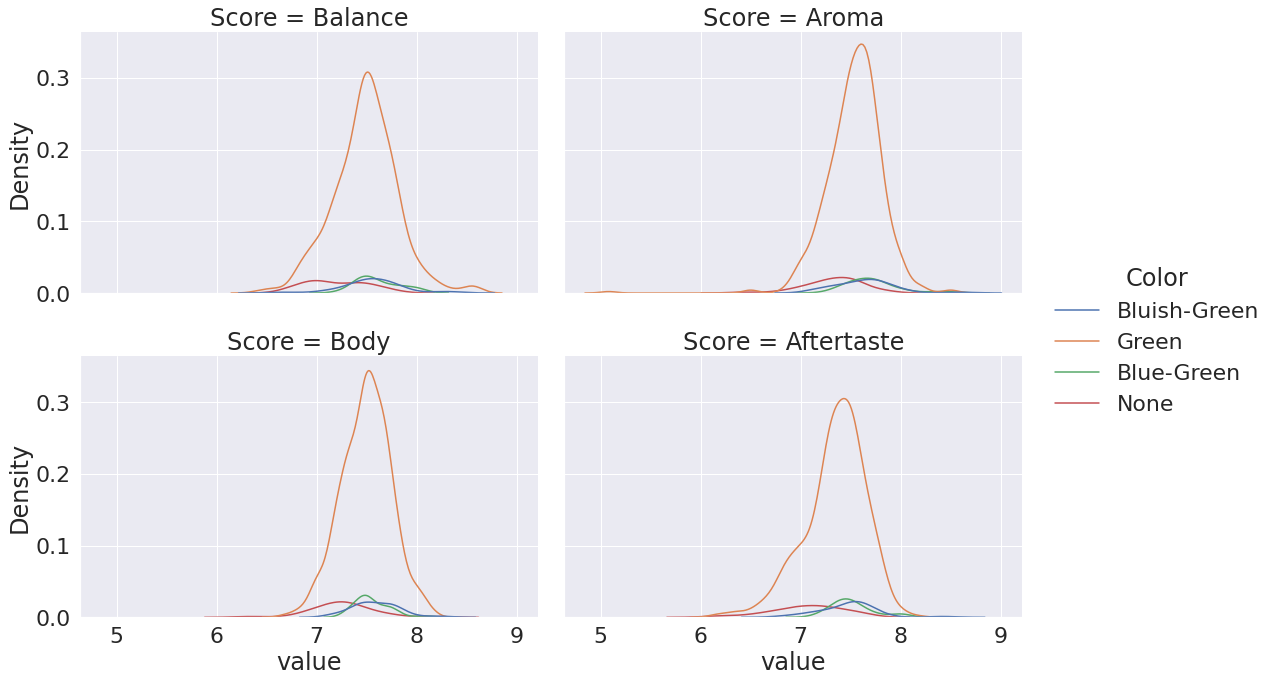

In [11]:
sns.displot(data= high_prod_coffee_df_melted,
           x='value',hue='Color',
           col = 'Score', col_wrap=2, kind='kde',aspect =1.5)

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


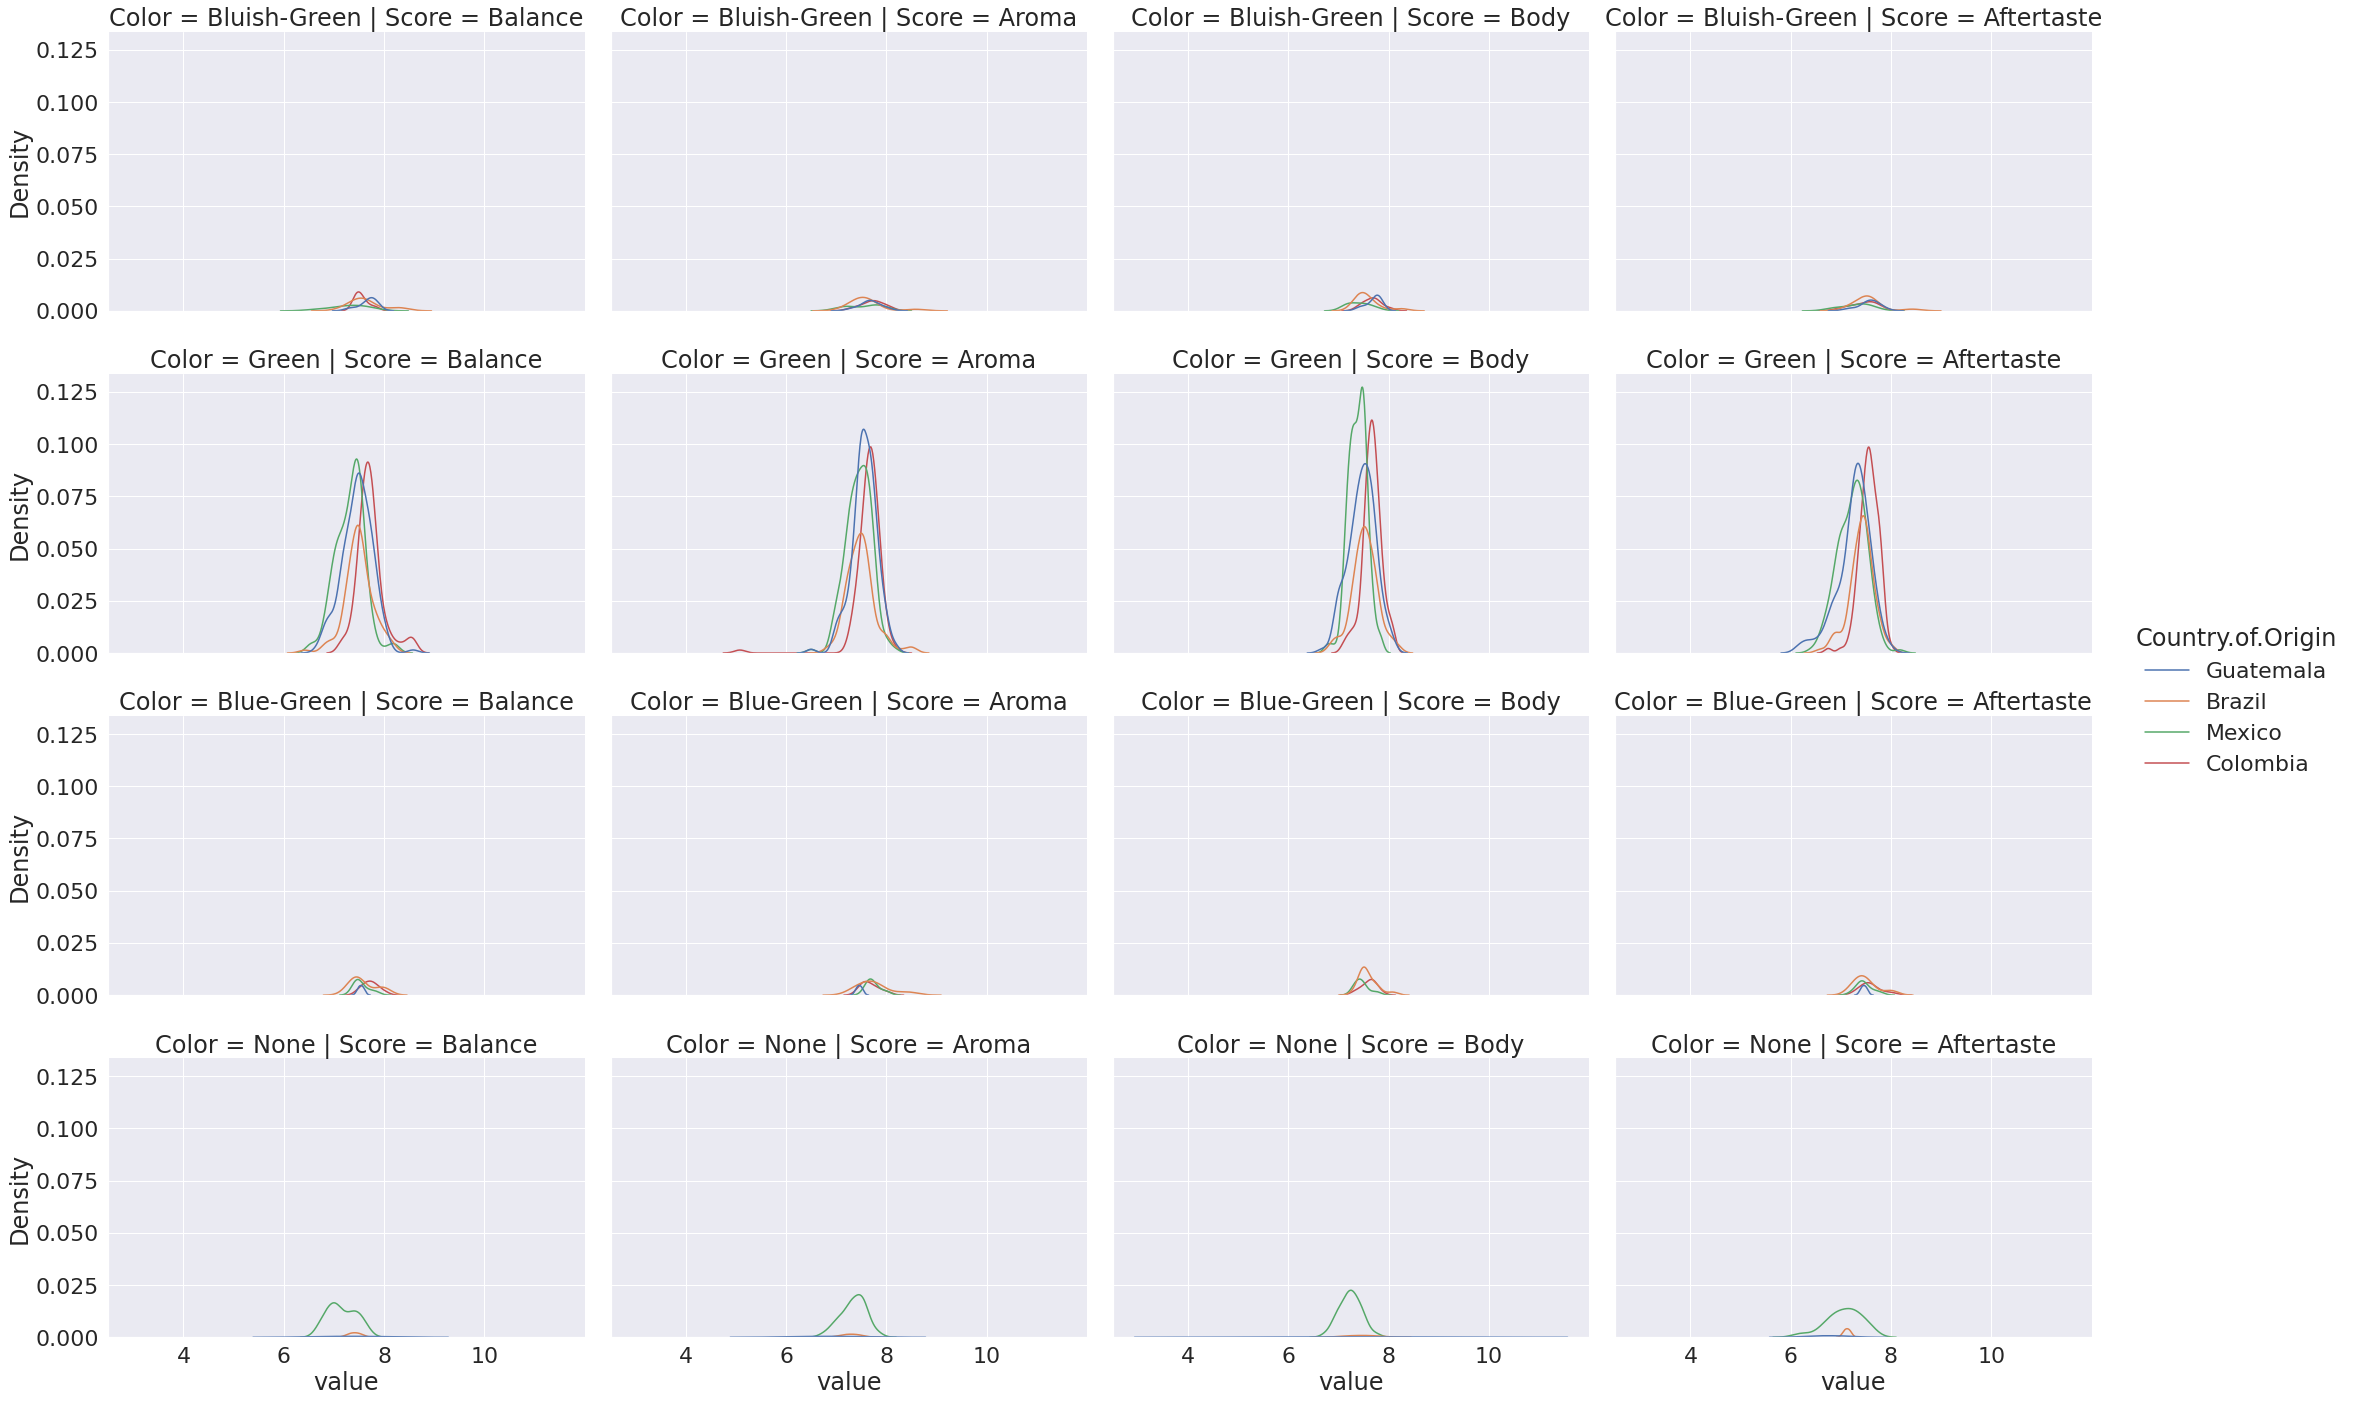

In [12]:
sns.displot(data= high_prod_coffee_df_melted,
           x='value',hue='Country.of.Origin',
           col = 'Score', row='Color', kind='kde',aspect =1.5)

(unpacking-jsons)=
## Unpacking Jsons

In [13]:
rhodyprog4ds_gh_events_url = 'https://api.github.com/orgs/rhodyprog4ds/events'

In [14]:
course_gh_df = pd.read_json(rhodyprog4ds_gh_events_url)
course_gh_df.head()

,id,type,actor,repo,payload,public,created_at,org
0,18365238993,PushEvent,"{'id': 10656079, 'login': 'brownsarahm', 'disp...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8119892949, 'size': 1, 'distinct_s...",True,2021-10-09 23:48:02+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
1,18358458964,PushEvent,"{'id': 41898282, 'login': 'github-actions[bot]...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8115654726, 'size': 1, 'distinct_s...",True,2021-10-08 22:21:19+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
2,18358425801,PushEvent,"{'id': 10656079, 'login': 'brownsarahm', 'disp...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8115637547, 'size': 1, 'distinct_s...",True,2021-10-08 22:16:47+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
3,18358425083,CreateEvent,"{'id': 10656079, 'login': 'brownsarahm', 'disp...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'ref': 'policyupdate', 'ref_type': 'branch', ...",True,2021-10-08 22:16:41+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
4,18358090127,PushEvent,"{'id': 41898282, 'login': 'github-actions[bot]...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8115467893, 'size': 1, 'distinct_s...",True,2021-10-08 21:34:54+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."


We want to transform each one of those from a dictionary like thing into a
row in a data frame.

In [15]:
type(course_gh_df['actor'])

pandas.core.series.Series

Recall, that base python types can be used as function, to cast an object from
type to another.

In [16]:
5

5

In [17]:
type(5)

int

In [18]:
str(5)

'5'

To unpack one column we can cast each element of the column to a series and then stack them back together.

First, let's look at one row of one column

In [19]:
course_gh_df['actor'][0]

{'id': 10656079,
 'login': 'brownsarahm',
 'display_login': 'brownsarahm',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/brownsarahm',
 'avatar_url': 'https://avatars.githubusercontent.com/u/10656079?'}

Now let's cast it to a Series

In [20]:
pd.Series(course_gh_df['actor'][0])

id                                                        10656079
login                                                  brownsarahm
display_login                                          brownsarahm
gravatar_id                                                       
url                       https://api.github.com/users/brownsarahm
avatar_url       https://avatars.githubusercontent.com/u/10656079?
dtype: object

What we want is to do this over and over and stack them.

 The `apply` method does this for us, in one compact step.

In [21]:
course_gh_df['actor'].apply(pd.Series)

,id,login,display_login,gravatar_id,url,avatar_url
0,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
1,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?
2,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
3,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
4,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?
5,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
6,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
7,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?
8,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
9,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?


How can we do this for all of the columns and put them back together after?

First, let's make a list of the columns we need to convert.

In [22]:
js_cols = ['actor','repo','payload','org']

When we use `.apply(pd.Series)` we get a a DataFrame.

In [23]:
type(course_gh_df['actor'].apply(pd.Series))

pandas.core.frame.DataFrame

`pd.concat` takes a list of DataFrames and puts the together in one DataFrame.

to illustrate, it's nice to make small dataFrames.

In [24]:
df1 = pd.DataFrame([[1,2,3],[3,4,7]], columns = ['A','B','t'])
df2 = pd.DataFrame([[10,20,30],[30,40,70]], columns = ['AA','BB','t'])
df1

,A,B,t
0,1,2,3
1,3,4,7


In [25]:
df2

,AA,BB,t
0,10,20,30
1,30,40,70


If we use concat with the default settings, it stacks them vertically and aligns any columns that have the same name.

In [26]:
pd.concat([df1,df2])

,A,B,t,AA,BB
0,1.0,2.0,3,NaN,NaN
1,3.0,4.0,7,NaN,NaN
0,NaN,NaN,30,10.0,20.0
1,NaN,NaN,70,30.0,40.0


So, since the original DataFrames were both 2 rows with 3 columns each, with one column name appearing in both, we end up with a new DataFrame with shape (4,5) and it fills with `NaN` in the top right and the bottom left.

In [27]:
pd.concat([df1,df2]).shape

(4, 5)

We can use the `axis` parameter to tell it how to combine them. The default is `axis=0`, but `axis=1` will combine along rows.

In [28]:
pd.concat([df1,df2], axis =1)

,A,B,t,AA,BB,t
0,1,2,3,10,20,30
1,3,4,7,30,40,70


So now we get no NaN values, because both DataFrames have the same number of rows and the same index.

In [29]:
df1.index == df2.index

array([ True,  True])

and we have a total of 6 columns and 2 rows.

In [30]:
pd.concat([df1,df2], axis =1).shape

(2, 6)

Back to our gh data, we want to make a list of DataFrames where each DataFrame corresponds to one of the columns in the original DataFrame, but unpacked and then stack them horizontally (`axis=1`) because each DataFrame in the list is based on the same original DataFrame, they again have the same index.

In [31]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=1)

,id,login,display_login,gravatar_id,url,avatar_url,id,name,url,push_id,...,master_branch,description,pusher_type,action,issue,id,login,gravatar_id,url,avatar_url
0,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.119893e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
1,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115655e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
2,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115638e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
3,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,NaN,...,main,CSC/DSP310 Fall 21,user,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
4,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115468e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
5,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115446e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
6,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400656699,rhodyprog4ds/rhodyds,https://api.github.com/repos/rhodyprog4ds/rhodyds,8.114514e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
7,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.104607e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
8,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.104558e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
9,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.099802e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?


```{admonition} Try it Yourself
examine the list of DataFrames to see what structure they share and do not share
```

In this case we get the same 30 rows, beacuse that's what the API gave us and turned our 4 columns from `js_cols` into 26 columns.

In [32]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=1).shape

(30, 27)

If we had used the default, we'd end up with 120 rows (30*4) and we have only 19 columns, because there are subfield names that are shared across the original columns. (eg most have an `id`)
````{margin}
```{admonition} Try it yourself
How could you anticipate how many are shared?
```
````

In [33]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=0).shape

(120, 20)

we might want to rename the new columns so that they have the original column
name prepended to the new name. This will help us distinguish between the different `id` columns

pandas has a `rename` method for this.

and this is another job for lambdas.

In [34]:
pd.concat([course_gh_df[cur_col].apply(pd.Series).rename(columns = lambda c: cur_col + '_' +c)
           for cur_col in js_cols],
         axis=1)

,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,repo_id,repo_name,repo_url,payload_push_id,...,payload_master_branch,payload_description,payload_pusher_type,payload_action,payload_issue,org_id,org_login,org_gravatar_id,org_url,org_avatar_url
0,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.119893e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
1,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115655e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
2,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115638e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
3,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,NaN,...,main,CSC/DSP310 Fall 21,user,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
4,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115468e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
5,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115446e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
6,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400656699,rhodyprog4ds/rhodyds,https://api.github.com/repos/rhodyprog4ds/rhodyds,8.114514e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
7,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.104607e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
8,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.104558e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
9,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.099802e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?


the `rename` method's `column` parameter can take a lambda defined inline, which is helpful, because we want that function to take one parameter (the current columnt name) and do the same thing to all of the columns within a single DataFrame, but to prepend a different thing for each DataFrame

In [35]:
pd.concat([course_gh_df[cur_col].apply(pd.Series).rename(columns = lambda c: cur_col + '_' +c)
           for cur_col in js_cols],
         axis=1)

,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,repo_id,repo_name,repo_url,payload_push_id,...,payload_master_branch,payload_description,payload_pusher_type,payload_action,payload_issue,org_id,org_login,org_gravatar_id,org_url,org_avatar_url
0,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.119893e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
1,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115655e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
2,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115638e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
3,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,NaN,...,main,CSC/DSP310 Fall 21,user,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
4,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115468e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
5,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.115446e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
6,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400656699,rhodyprog4ds/rhodyds,https://api.github.com/repos/rhodyprog4ds/rhodyds,8.114514e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
7,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.104607e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
8,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.104558e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
9,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.099802e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?


So now, we have the unpacked columns with good column names, but we lost the columns that were originally good.


How can we append the new columns to the old ones?
First we can make a DataFrame that's just the columns not on the list that we're goign to expand.

In [36]:
course_gf_df_good = course_gh_df[[col for col in
          course_gh_df.columns if not(col in js_cols)]]
course_gf_df_good

,id,type,public,created_at
0,18365238993,PushEvent,True,2021-10-09 23:48:02+00:00
1,18358458964,PushEvent,True,2021-10-08 22:21:19+00:00
2,18358425801,PushEvent,True,2021-10-08 22:16:47+00:00
3,18358425083,CreateEvent,True,2021-10-08 22:16:41+00:00
4,18358090127,PushEvent,True,2021-10-08 21:34:54+00:00
5,18358045127,PushEvent,True,2021-10-08 21:30:00+00:00
6,18356166520,PushEvent,True,2021-10-08 18:30:47+00:00
7,18336123842,PushEvent,True,2021-10-07 14:57:19+00:00
8,18336020186,PushEvent,True,2021-10-07 14:51:52+00:00
9,18326289970,PushEvent,True,2021-10-07 02:44:13+00:00


Then we can prepend that to the list that we pass to `concat`. We have to put it in a list first, then use + to do that.

In [37]:
pd.concat([course_gf_df_good]+[course_gh_df[col].apply(pd.Series,).rename(
  columns= lambda i_col: col + '_' + i_col )
      for col in js_cols],axis=1)

,id,type,public,created_at,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,...,payload_master_branch,payload_description,payload_pusher_type,payload_action,payload_issue,org_id,org_login,org_gravatar_id,org_url,org_avatar_url
0,18365238993,PushEvent,True,2021-10-09 23:48:02+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
1,18358458964,PushEvent,True,2021-10-08 22:21:19+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
2,18358425801,PushEvent,True,2021-10-08 22:16:47+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
3,18358425083,CreateEvent,True,2021-10-08 22:16:41+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,main,CSC/DSP310 Fall 21,user,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
4,18358090127,PushEvent,True,2021-10-08 21:34:54+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
5,18358045127,PushEvent,True,2021-10-08 21:30:00+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
6,18356166520,PushEvent,True,2021-10-08 18:30:47+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
7,18336123842,PushEvent,True,2021-10-07 14:57:19+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
8,18336020186,PushEvent,True,2021-10-07 14:51:52+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
9,18326289970,PushEvent,True,2021-10-07 02:44:13+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?


To see how the list math works

In [38]:
['a'] + ['b','c','d']

['a', 'b', 'c', 'd']

results in one list

but without the `[]` we get a type error

In [39]:
'a' + ['b','c','d']

TypeError: can only concatenate str (not "list") to str

List operations return `None` and mutate the list in place so

In [40]:
orig_list = ['a']
new_items = ['b','c','d']
orig_list.extend(new_items)

outputs nothing because `None` was returned and it changes the original variable.

In [41]:
orig_list

['a', 'b', 'c', 'd']

In [42]:
type(orig_list.extend(new_items))

NoneType

is none.


## Questions After Class

All clarifying questions today

### How does Axis work?
```{toggle}
the notes above are expanded a lot, which should help. You can see more examples in the [Tidy Data Explanation](https://rhodyprog4ds.github.io/BrownFall21/notes/2021-09-27.html#tidy-data) and on the [Cheat Sheet](../resources/cheatsheet).  

The `axis` parameter is a parameter in a lot of pandas functions, you can see it used in most of the statistics we used last week as well, because though column operations are the default, we *can* do row-wise as well.

For more on concatenation, see the [Pandas user guide](https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-objects) or [API docs](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat) sections on it.
```

### How does melt work?
```{toggle}
the notes are expanded a lot. Also see [Tidying data](https://rhodyprog4ds.github.io/BrownFall21/notes/2021-09-27.html#tidying-data).

For the concept, you can also see the original [Tidy Data paper](https://www.jstatsoft.org/article/view/v059i10).

For the pandas method, see its [docs](https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt).
```

### What about the NaNs that are still left?
````{toggle}
those are Nan in the data because the events are different types and different types of events have different information available about them.

If we `groupby` event type and then look at, for example, the payload columns. We see that the `NaN`s are explained by that. (remember, count tells how many are not `NaN`)
```{code-cell} ipython3
course_gh_df_expanded.groupby('type')[[c
                for c in course_gh_df_expanded.columns if 'payload' in c]].count()
```
````